In [2]:
import matplotlib.pyplot as plt

Izračunajte temperature na prehodih slojev v večslojnem zidu, če sta podani notranja temperatura $T_n$ ter zunanja temperatura $T_z$ in sestava zidu z debelinami slojev ($s_x$) in toplotno prevodnostjo slojev ($\lambda_x$). Sestavo zidu preberete iz datoteke zid_sloji.txt.
Naritište graf poteka temperature v zidu. 

Temperaturo na prehodu naslednjega sloja izračunamo iz temperature na predhodnem sloju:

\begin{aligned}
t_{k+1} &= t_{k} - q \cdot  \frac{ \lambda_{k} }{ s_{k} }    
\end{aligned}


Toplotni tok izračunamo kot:

\begin{aligned}
q &= \frac{ T_{z} - T_{n} }{  \frac{ \lambda_{1} }{ s_{1} }  +  \frac{ \lambda_{2} }{ s_{2} } + ... }   
\end{aligned}


In [108]:
T_z = 17
T_n = 23

In [181]:
with open('zid_sloji.txt') as f:
    f.readline()
    sloji_debelina = []
    sloji_prevodnost = []
    sloji_prehodi = [0]
    sloji_nazivi = []
    prehod = 0
    for v in f:
        podatki = v.split(';')
        d = float(podatki[1].strip().replace(',','.'))
        l = float(podatki[2].strip().replace(',','.'))
        prehod += d 
        sloji_debelina.append(d)
        sloji_prevodnost.append(l)
        sloji_prehodi.append(prehod)
        sloji_nazivi.append(podatki[3].strip())

debelina_zidu = prehod

In [120]:
vsota_kvocientov = 0
for i in range(len(sloji_debelina)):
    vsota_kvocientov += sloji_prevodnost[i]/sloji_debelina[i]

q = (T_z - T_n)/vsota_kvocientov

In [143]:
temperature = [T_z]
t_k = T_z
for i in range(len(sloji_debelina)):
    t_k = t_k - q * sloji_prevodnost[i]/sloji_debelina[i]
    temperature.append(t_k)


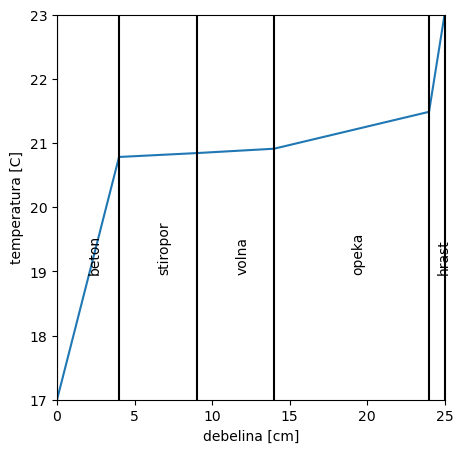

In [195]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(sloji_prehodi, temperature)
ax.set_xlabel('debelina [cm]')
ax.set_ylabel('temperatura [C]')
ax.axis([0, debelina_zidu, T_z, T_n])

for x in sloji_prehodi:
    ax.axvline(x, c='black')

for i in range(len(sloji_nazivi)):
    x = (sloji_prehodi[i+1] + sloji_prehodi[i]) / 2 
    ax.text(x, T_z + 2, sloji_nazivi[i], rotation=90)
    